# NEVI

The NEVI project aims to prove usefullness of CNN for skin cancer recognition using image processing and deep convolutional neural networks with transfer learning.

In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet_v2 import EfficientNetV2S, preprocess_input
from keras.layers import Dense, Dropout
from keras.models import Sequential
from keras.models import load_model
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import PIL


By Type

In [2]:
TYPE_DATA_FOLDER_PATH  = "..\\data\\grouped_images_by_type"
AKIEC_DATA_FOLDER_PATH = "..\\data\\grouped_images_by_type\\akiec\\*"
BCC_DATA_FOLDER_PATH   = "..\\data\\grouped_images_by_type\\bcc\\*"
BKL_DATA_FOLDER_PATH   = "..\\data\\grouped_images_by_type\\bkl\\*"
DF_DATA_FOLDER_PATH    = "..\\data\\grouped_images_by_type\\df\\*"
MEL_DATA_FOLDER_PATH   = "..\\data\\grouped_images_by_type\\mel\\*"
NV_DATA_FOLDER_PATH    = "..\\data\\grouped_images_by_type\\nv\\*"
VASC_DATA_FOLDER_PATH  = "..\\data\\grouped_images_by_type\\vasc\\*"
AKIEC_DATA_FOLDER_PATH_TEST = "..\\data\\secret_test_folder\\akiec\\*"
BCC_DATA_FOLDER_PATH_TEST   = "..\\data\\secret_test_folder\\bcc\\*"
BKL_DATA_FOLDER_PATH_TEST   = "..\\data\\secret_test_folder\\bkl\\*"
DF_DATA_FOLDER_PATH_TEST    = "..\\data\\secret_test_folder\\df\\*"
MEL_DATA_FOLDER_PATH_TEST   = "..\\data\\secret_test_folder\\mel\\*"
NV_DATA_FOLDER_PATH_TEST    = "..\\data\\secret_test_folder\\nv\\*"
VASC_DATA_FOLDER_PATH_TEST  = "..\\data\\secret_test_folder\\vasc\\*"
TARGET_SIZE = (256, 256)
INPUT_SHAPE = (256, 256, 3)
BATCH_SIZE = 20

In [3]:
imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH)
imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH)
imgs_BKL    = glob.glob(BKL_DATA_FOLDER_PATH)
imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH)
imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH)
imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH)
imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH)

test_imgs_AKIEC  = glob.glob(AKIEC_DATA_FOLDER_PATH_TEST)
test_imgs_BCC    = glob.glob(BCC_DATA_FOLDER_PATH_TEST)
test_imgs_BKL    = glob.glob(BKL_DATA_FOLDER_PATH_TEST)
test_imgs_DF     = glob.glob(DF_DATA_FOLDER_PATH_TEST)
test_imgs_MEL    = glob.glob(MEL_DATA_FOLDER_PATH_TEST)
test_imgs_NV     = glob.glob(NV_DATA_FOLDER_PATH_TEST)
test_imgs_VASC   = glob.glob(VASC_DATA_FOLDER_PATH_TEST)

df_AKIEC = pd.DataFrame({'filename': imgs_AKIEC})
df_AKIEC['class'] = 'AKIEC'
df_BCC = pd.DataFrame({'filename': imgs_BCC})
df_BCC['class'] = 'BCC'
df_BKL = pd.DataFrame({'filename': imgs_BKL})
df_BKL['class'] = 'BKL'
df_DF = pd.DataFrame({'filename': imgs_DF})
df_DF['class'] = 'DF'
df_MEL = pd.DataFrame({'filename': imgs_MEL})
df_MEL['class'] = 'MEL'
df_NV = pd.DataFrame({'filename': imgs_NV})
df_NV['class'] = 'NV'
df_VASC = pd.DataFrame({'filename': imgs_VASC})
df_VASC['class'] = 'VASC'

df_test_AKIEC = pd.DataFrame({'filename': test_imgs_AKIEC})
df_test_AKIEC['class'] = 'AKIEC'
df_test_BCC = pd.DataFrame({'filename': test_imgs_BCC})
df_test_BCC['class'] = 'BCC'
df_test_BKL = pd.DataFrame({'filename': test_imgs_BKL})
df_test_BKL['class'] = 'BKL'
df_test_DF = pd.DataFrame({'filename': test_imgs_DF})
df_test_DF['class'] = 'DF'
df_test_MEL = pd.DataFrame({'filename': test_imgs_MEL})
df_test_MEL['class'] = 'MEL'
df_test_NV = pd.DataFrame({'filename': test_imgs_NV})
df_test_NV['class'] = 'NV'
df_test_VASC = pd.DataFrame({'filename': test_imgs_VASC})
df_test_VASC['class'] = 'VASC'

AKIEC = 'AKIEC'
BCC = 'BCC'
BKL = 'BKL'
DF = 'DF'
MEL = 'MEL'
NV = 'NV'
VASC = 'VASC'
BCC_DF = "BCC_DF"
MEL_NV = "MEL_NV"
BKL_AKIEC = "BKL_AKIEC"


# Experiment

df_bcc_df = pd.concat([df_BCC, df_DF])
df_bcc_df["class"] = "BCC_DF"
df_mel_nv = pd.concat([df_MEL, df_NV])
df_mel_nv["class"] = "MEL_NV"
df_bkl_akiec = pd.concat([df_BKL, df_AKIEC])
df_bkl_akiec["class"] = "BKL_AKIEC"

df_test_bcc_df = pd.concat([df_test_BCC, df_test_DF])
df_test_bcc_df["class"] = "BCC_DF"
df_test_mel_nv = pd.concat([df_test_MEL, df_test_NV])
df_test_mel_nv["class"] = "MEL_NV"
df_test_bkl_akiec = pd.concat([df_test_BKL, df_test_AKIEC])
df_test_bkl_akiec["class"] = "BKL_AKIEC"

df_root = pd.concat([df_bcc_df, df_mel_nv, df_bkl_akiec, df_VASC])
df_test_root = pd.concat([df_test_bcc_df, df_test_mel_nv, df_test_bkl_akiec, df_test_VASC])
df, df_val = train_test_split(df_root, stratify=df_root["class"], test_size=.08)


In [4]:


data_generator_vis = ImageDataGenerator()
flow_vis = data_generator_vis.flow_from_directory(
    TYPE_DATA_FOLDER_PATH,
    shuffle=False
)

Found 19329 images belonging to 7 classes.


In [5]:
data_generator_train = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=90,
    shear_range=.1,
    brightness_range=[0.6,1.0]
)

data_generator_val = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

data_generator_test = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

In [6]:
flow_train = data_generator_train.flow_from_dataframe(
    df,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
)

flow_val = data_generator_val.flow_from_dataframe(
    df_val,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True
    
)

flow_test = data_generator_test.flow_from_dataframe(
    df_test_root,
    target_size=TARGET_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 17782 validated image filenames belonging to 4 classes.
Found 1547 validated image filenames belonging to 4 classes.
Found 391 validated image filenames belonging to 4 classes.


In [7]:
EfficientNet = EfficientNetV2S(
    include_top=False,
    weights='imagenet',
    input_shape=INPUT_SHAPE,
    pooling='max'
)

In [12]:
def get_model(base_model, activation="softmax", optimizer: str="adam", loss_function: str="CategoricalCrossentropy"):
    model = Sequential([
        base_model,
        Dropout(.2),
        Dense(4, activation=activation)
    ])
    
    for layer in model.layers[:-1]:
        layer.trainable=True
        
    model.compile(
        optimizer,
        loss_function,
        metrics=[
            "accuracy"
        ]
    )
    
    return model

In [13]:
model_eff_layer1 = get_model(EfficientNet)

In [8]:
model_eff_layer1 = load_model(r"D:\Projects\thesis\src\model\cascade\layer1\experimental_model_layer1.h5")

In [21]:
history_eff2 = model_eff_layer1.fit(
    flow_train,
    validation_data=flow_val,
    epochs=1
)

890/890 [==============================] - 248s 278ms/step - loss: 0.0490 - accuracy: 0.9812 - val_loss: 0.1240 - val_accuracy: 0.9677


In [23]:
from keras import Model
Model.save(
    model_eff_layer1,
    filepath=".\\model\\cascade\\layer1\\experimental_model_layer1.h5",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None,
    save_traces=True,
)

In [9]:
_, resnet_accuracy = model_eff_layer1.evaluate(flow_test)

20/20 [==============================] - 10s 122ms/step - loss: 0.1642 - accuracy: 0.9488


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(history_eff2.history["accuracy"])
plt.plot(history_eff2.history["val_accuracy"])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(history_eff2.history["loss"])
plt.plot(history_eff2.history["val_loss"])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

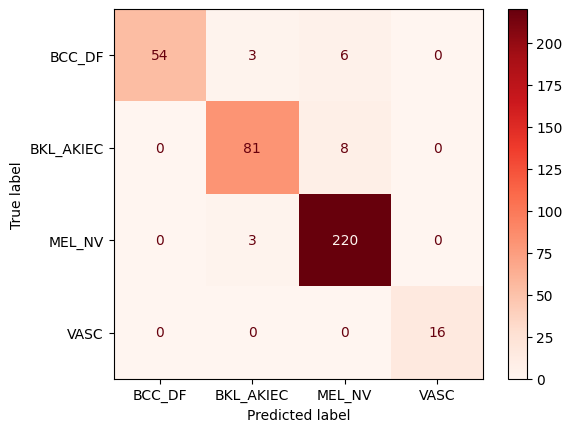

[0.83465445 0.10830554 0.05514423 0.00189569]


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
ava_labels = [
    BCC_DF,
    BKL_AKIEC,
    MEL_NV,
    VASC
]
true_labels = flow_test.classes
predictions = model_eff_layer1.predict(flow_test)
y_true = true_labels
y_pred = np.array([np.argmax(x) for x in predictions])
cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred, target_names=ava_labels)
disp = ConfusionMatrixDisplay(cm, display_labels=ava_labels)
disp.plot(cmap=plt.cm.Reds)
plt.show()
print(predictions[6])

In [57]:
from skimage import transform
from PIL import Image
import cv2

class Predictor:
    def __init__(self, model_path: str):
        self.model = load_model(model_path)

    def predict(self, image):
        np_image = np.array(image).astype(float)
        np_image = transform.resize(np_image, (256, 256, 3))
        np_image = np.expand_dims(np_image, axis=0)
        np_image = preprocess_input(np_image)
        result = self.model.predict(np_image)[0]
        print(result)
        return self.map_results(result)

    def map_results(self, results: list):
        map_results = {
            0: "Actinic keratoses and intraepithelial carcinoma / Bowen's diesease",
            1: "You die bro",
            2: "Benign keratosis-like lesions",
            3: "Dermatofibroma",
            4: "Melanoma",
            5: "Melanocytic nevi",
            6: "Vascular lesions"
        }
        return map_results[np.argmax(results)]


if __name__ == "__main__":
    # with open(r"D:\Projects\thesis\grouped_images_by_severity\benign\ISIC_0024306.jpg", "r") as f:
    img = Image.open(r"D:\Projects\thesis\grouped_images_by_type\nv\ISIC_0034098.jpg")
    pred = Predictor(r"D:\Projects\thesis\model\experimental_model_S8")
    pred = pred.predict(img)
    print(pred)
